In [35]:
# import usefull libraries for manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords


#for converting text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# for training,selecting,and Evaluating
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
file_path = '/content/sample_data/Credit Banking - 3.xls'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
sheet_names

['Project_2', 'Curtomer_Info']

In [37]:
df1 = pd.read_excel(file_path, sheet_name=sheet_names[0])
df2 = pd.read_excel(file_path, sheet_name=sheet_names[1])


In [38]:
df1.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
0,4595.0,534,SHOES,New,RKFCM,1484.74,1471.74,BN710,2014-08-26,17:16:17,3109172,547836726,Peninsula Beauty,YE5901,Prepaid card,30462,0,NaT
1,6679.0,396,LUGGAGE,New,TNVON,1452.50,1442.50,KF815,2014-01-26,15:40:52,7583605,279617132,DODOcase,UW7354,Mobile carrier Billing,37927,0,NaT
2,7075.0,449,SHOES,Refurbished,VKKEA,4308.02,4284.02,UG960,2014-01-03,01:29:05,9985192,633765867,Staples,VN6656,Credit card,80640,0,NaT
3,1418.0,145,BEDDING,New,PIUEM,3272.59,3249.59,DK471,2014-05-30,09:10:00,7720605,734500382,Road Runner Sports,MS6579,Prepaid card,58692,0,NaT
4,6740.0,844,ELECTRONICS,Used,FMBZC,628.67,608.67,OJ311,2014-08-14,05:31:30,8367528,241944637,L'Occitane,GN3944,Debit card,21505,0,NaT


In [39]:
df2.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address
0,3768,eddie@yahoomail.com,EDDIE,9045258449,M,83,Louisville,Kentucky,Masked
1,4852,rose@hotmail.com,ROSE,8834789103,F,87,Kansas City,Missouri,Masked
2,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked
3,4807,clarence@gmail.com,CLARENCE,9394398429,M,37,Seattle,Washington,Masked
4,9131,johnny@hotmail.com,JOHNNY,9976623538,F,80,Columbus,Ohio,Masked


In [40]:
df1.columns

Index(['Credit_card', 'Product_ID', 'P_CATEGORY', 'CONDTION', 'Brand',
       'Price ', 'Selling_price', 'Coupon_ID', 'Date', 'Time', 'GTIN', 'MPN',
       'Merchant_name', 'M_ID', 'Payment Method', 'Transaction ID',
       'Return_ind', 'Return_date'],
      dtype='object')

In [41]:
df2.columns

Index(['C_ID', 'Email', 'Name', 'Mobile_number', 'Gender', 'Age', 'City ',
       'State', 'Address'],
      dtype='object')

In [42]:
# path to where My file is located
file_path = '/content/sample_data/Credit Banking - 3.xls'
data= pd.read_excel(file_path)

In [43]:
data.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
0,4595.0,534,SHOES,New,RKFCM,1484.74,1471.74,BN710,2014-08-26,17:16:17,3109172,547836726,Peninsula Beauty,YE5901,Prepaid card,30462,0,NaT
1,6679.0,396,LUGGAGE,New,TNVON,1452.50,1442.50,KF815,2014-01-26,15:40:52,7583605,279617132,DODOcase,UW7354,Mobile carrier Billing,37927,0,NaT
2,7075.0,449,SHOES,Refurbished,VKKEA,4308.02,4284.02,UG960,2014-01-03,01:29:05,9985192,633765867,Staples,VN6656,Credit card,80640,0,NaT
3,1418.0,145,BEDDING,New,PIUEM,3272.59,3249.59,DK471,2014-05-30,09:10:00,7720605,734500382,Road Runner Sports,MS6579,Prepaid card,58692,0,NaT
4,6740.0,844,ELECTRONICS,Used,FMBZC,628.67,608.67,OJ311,2014-08-14,05:31:30,8367528,241944637,L'Occitane,GN3944,Debit card,21505,0,NaT


In [44]:
data.tail()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
9994,8609.0,470,APPLIANCES,New,TTNTN,1187.85,1187.85,FL494,2014-08-09,18:09:03,7482917,337083364,Cole Hardware,EX7729,Credit card,17306,0,NaT
9995,9725.0,406,CLOTHING,Used,ONKHS,2202.20,2202.20,DP660,2014-11-02,12:31:20,6749808,354170741,Cole Hardware,EX7730,Prepaid card,41829,0,NaT
9996,1548.0,694,ELECTRONICS,New,AGSDS,3123.80,3079.80,VI354,2014-02-09,20:06:24,7644170,101023606,Barnes & Noble,EY1659,Mobile carrier Billing,34577,0,NaT
9997,4878.0,552,SHOES,New,RKFCM,1257.44,1227.44,UQ360,2014-01-17,12:14:24,8336204,320092897,Gymboree,ZF8986,Mobile carrier Billing,43458,0,NaT
9998,8532.0,395,OFFICE SUPPLIES,New,WELZA,2909.68,2883.68,SI291,2014-05-26,10:40:05,1813449,615832837,DODOcase,UW7356,Credit card,82048,0,NaT


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Credit_card     9994 non-null   float64       
 1   Product_ID      9999 non-null   int64         
 2   P_CATEGORY      9999 non-null   object        
 3   CONDTION        9999 non-null   object        
 4   Brand           9999 non-null   object        
 5   Price           9999 non-null   float64       
 6   Selling_price   9999 non-null   float64       
 7   Coupon_ID       9979 non-null   object        
 8   Date            9999 non-null   datetime64[ns]
 9   Time            9999 non-null   object        
 10  GTIN            9999 non-null   int64         
 11  MPN             9999 non-null   int64         
 12  Merchant_name   9999 non-null   object        
 13  M_ID            9999 non-null   object        
 14  Payment Method  9999 non-null   object        
 15  Tran

In [46]:
data.describe()

,Credit_card,Product_ID,Price,Selling_price,Date,GTIN,MPN,Transaction ID,Return_ind,Return_date
count,9994.000000,9999.000000,9999.000000,9999.000000,9999,9.999000e+03,9.999000e+03,9999.000000,9999.000000,1532
mean,5728.449470,568.450645,2657.078825,2627.213138,2014-06-15 05:56:08.856885504,5.459239e+06,5.545180e+08,49977.002100,0.153215,2014-06-16 02:20:03.133159424
min,1093.000000,111.000000,42.130000,-1.870000,2014-01-01 00:00:00,1.000909e+06,1.003140e+08,198.000000,0.000000,2014-01-01 00:00:00
25%,3500.000000,343.000000,1435.770000,1408.500000,2014-03-14 00:00:00,3.176675e+06,3.312793e+08,24419.000000,0.000000,2014-03-17 00:00:00
50%,5850.000000,607.000000,2830.510000,2783.250000,2014-06-04 00:00:00,5.541936e+06,5.599136e+08,50394.000000,0.000000,2014-06-05 00:00:00
75%,7979.000000,772.000000,3827.740000,3806.740000,2014-09-16 00:00:00,7.601389e+06,7.765952e+08,74134.000000,0.000000,2014-09-17 06:00:00
max,9950.000000,996.000000,4993.380000,4990.970000,2014-12-31 00:00:00,9.997547e+06,9.997557e+08,99995.000000,1.000000,2014-12-31 00:00:00
std,2619.421223,253.915314,1416.698466,1416.422587,NaN,2.580324e+06,2.585180e+08,28933.097165,0.360213,NaN


In [47]:
data.columns

Index(['Credit_card', 'Product_ID', 'P_CATEGORY', 'CONDTION', 'Brand',
       'Price ', 'Selling_price', 'Coupon_ID', 'Date', 'Time', 'GTIN', 'MPN',
       'Merchant_name', 'M_ID', 'Payment Method', 'Transaction ID',
       'Return_ind', 'Return_date'],
      dtype='object')

In [48]:
# null value count
data.isnull().sum()

,0
Credit_card,5
Product_ID,0
P_CATEGORY,0
CONDTION,0
Brand,0
Price,0
Selling_price,0
Coupon_ID,20
Date,0
Time,0


In [49]:
data.count()

,0
Credit_card,9994
Product_ID,9999
P_CATEGORY,9999
CONDTION,9999
Brand,9999
Price,9999
Selling_price,9999
Coupon_ID,9979
Date,9999
Time,9999


In [50]:
data.duplicated().sum()

7120

In [51]:
data.drop_duplicates(inplace=True)

In [52]:
data.value_counts()

Credit_card  Product_ID  P_CATEGORY        CONDTION     Brand  Price    Selling_price  Coupon_ID  Date        Time      GTIN     MPN        Merchant_name       M_ID    Payment Method          Transaction ID  Return_ind  Return_date
1093.0       151         COMPUTERS         New          DCJRW  1363.08  1333.08        NM501      2014-03-12  17:47:25  1143891  579612704  Barnes & Noble      EY1660  Debit card              18187           1           2014-03-19     1
7433.0       765         DECOR             Refurbished  ZACKV  356.18   319.18         JJ805      2014-03-06  01:11:39  7569116  400272922  The Vitamin Shoppe  HW9975  Mobile carrier Billing  85734           1           2014-03-13     1
7486.0       195         BEDDING           Used         CJUEU  3757.01  3744.01        PF254      2014-11-10  13:17:30  2364335  995230518  Ulta                UO9656  Prepaid card            16027           1           2014-11-17     1
7481.0       572         KITCHEN & DINING  New          ZGHYW  3905.61  3869.61        VG212      2014-10-11  06:40:31  1723418  368923773  Guitar Center       GN3989  Credit card             64445           1           2014-10-18     1
             145         CLOTHING          New          ZVYTC  3631.77  3595.77        WA104      2014-06-01  09:04:27  3545064  507476196  Nine West           RM9837  Mobile carrier Billing  10731           1           2014-06-08     1
                                                                                                                                                                                                                                          ..
4284.0       616         OFFICE SUPPLIES   Used         EVWJY  1011.90  975.90         HC346      2014-11-04  13:59:33  1788769  447025179  Cole Hardware       EX7730  Mobile carrier Billing  7283            1           2014-11-29     1
             604         ELECTRONICS       Used         CWTLA  4526.52  4502.52        BC378      2014-10-02  23:07:07  2189822  603655962  PetSmart            IB7024  Credit card             35884           1           2014-10-09     1
             484         APPLIANCES        Used         BUDLO  986.46   964.46         ZG495      2014-07-07  17:06:04  2288458  153834638  Guitar Center       GN4349  Credit card             19025           1           2014-07-29     1
             343         OFFICE SUPPLIES   Refurbished  WELZA  2882.87  2842.87        UU491      2014-03-29  05:13:08  6819442  361424012  Cole Hardware       EX7730  Credit card             61606           1           2014-04-05     1
9950.0       844         ELECTRONICS       Used         FMBZC  628.67   588.67         LG292      2014-03-27  10:14:56  3042189  223937454  L'Occitane          GN3944  Credit card             33563           1           2014-04-03     1
Name: count, Length: 1358, dtype: int64

In [53]:
data.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
0,4595.0,534,SHOES,New,RKFCM,1484.74,1471.74,BN710,2014-08-26,17:16:17,3109172,547836726,Peninsula Beauty,YE5901,Prepaid card,30462,0,NaT
1,6679.0,396,LUGGAGE,New,TNVON,1452.50,1442.50,KF815,2014-01-26,15:40:52,7583605,279617132,DODOcase,UW7354,Mobile carrier Billing,37927,0,NaT
2,7075.0,449,SHOES,Refurbished,VKKEA,4308.02,4284.02,UG960,2014-01-03,01:29:05,9985192,633765867,Staples,VN6656,Credit card,80640,0,NaT
3,1418.0,145,BEDDING,New,PIUEM,3272.59,3249.59,DK471,2014-05-30,09:10:00,7720605,734500382,Road Runner Sports,MS6579,Prepaid card,58692,0,NaT
4,6740.0,844,ELECTRONICS,Used,FMBZC,628.67,608.67,OJ311,2014-08-14,05:31:30,8367528,241944637,L'Occitane,GN3944,Debit card,21505,0,NaT


In [54]:
# Fill missing Credit Card entries
data['Credit_card'] = data['Credit_card'].fillna('No Entry')

In [55]:
# Apply a 5% discount if Price equals Selling Price and there's a Coupon Code
data.loc[(data['Price '] == data['Selling_price']) & (data['Coupon_ID'].notnull()), 'Selling_price'] *= 0.95

In [56]:
# Ensure Return Date is after Purchase Date
data = data[data['Return_date'] > data['Date']]

In [57]:
# Handling NULL values in Coupon ID
data.loc[data['Coupon_ID'].isnull(), 'Discount'] = 0

<ipython-input-57-c998dc66eb7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['Coupon_ID'].isnull(), 'Discount'] = 0


In [58]:
duplicate_transaction_ids = data[data.duplicated(subset=['Transaction ID'], keep=False)]['Transaction ID'].unique()

if len(duplicate_transaction_ids) > 0:
  print(f"Duplicate Transaction IDs found:\n{duplicate_transaction_ids}")
else:
  print("No duplicate Transaction IDs found.")

Duplicate Transaction IDs found:
[40788 99544 91066 59297 77905 58089 66597 43371 18427 44781 69142 70843
 79912 91675 14601 94647 47219 27713 94189 40890 29537 37874 87588 57172
 57874 52468 94691 37717 83882 94429  2828 73834 39819 64222   805 48274
 65424 50018 25685 97131 10276 91805 13432 21140 97999 37429 69180 64510
 99001 64322  1167 93708 95748 51445 65333 94319 27529 35416 18907 43342
 48765  7283 70156 35063  1278  1230 22047 95328 29354 81130 53327 87915]


In [59]:
data.drop_duplicates(subset=['Transaction ID'], keep='first', inplace=True)

<ipython-input-59-ba184e7d8e9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset=['Transaction ID'], keep='first', inplace=True)


In [60]:
# Ensuring unique Transaction IDs
if data['Transaction ID'].is_unique:
    print("All Transaction IDs are unique.")
else:
    print("Some Transaction IDs are not unique.")

All Transaction IDs are unique.


In [61]:
# age bins and labels
bins = [18, 35, 50, float('inf')]
labels = ['Young', 'Mid age', 'Old']
data['Age Group'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=False)

# Segment by age and gender
data['Segment'] = df2['Gender'].astype(str) + ' ' + data['Age Group'].astype(str) # Use df2 instead of data to access 'Gender' column

<ipython-input-61-4f0315a529f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age Group'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=False)
<ipython-input-61-4f0315a529f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Segment'] = df2['Gender'].astype(str) + ' ' + data['Age Group'].astype(str) # Use df2 instead of data to access 'Gender' column


In [62]:

spending_by_product = data.groupby('Product_ID')['Selling_price'].sum()

# Display the top 5 products by spending
spending_by_product.sort_values(ascending=False).head(5)

,Selling_price
Product_ID,
702,70512.56
694,70024.07
722,61510.61
657,60123.09
136,57624.64


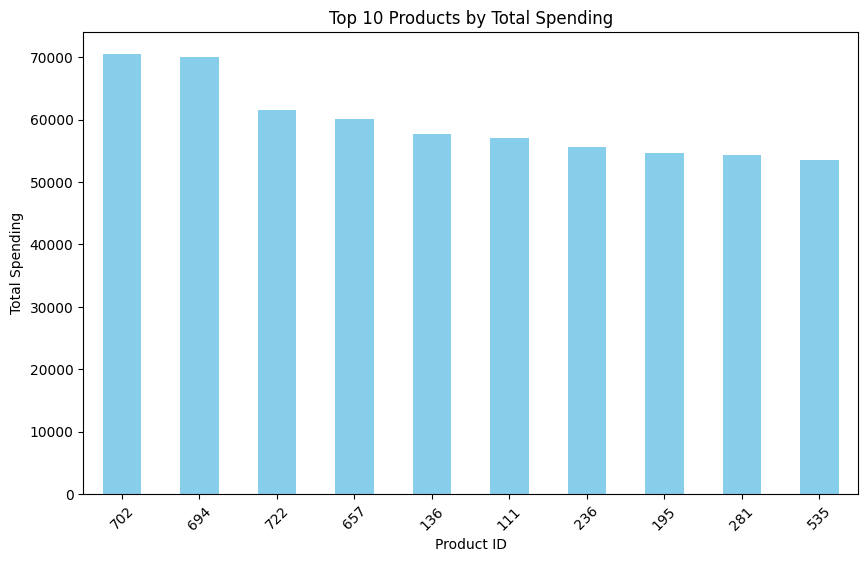

In [63]:

spending_by_product = data.groupby('Product_ID')['Selling_price'].sum()

# Plot the top 10 products by spending
plt.figure(figsize=(10,6))
spending_by_product.nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Spending')
plt.xlabel('Product ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

In [64]:
common_index = (df2.index).intersection(df1.index)

In [65]:

spending_by_payment_method = data.groupby('Payment Method')['Selling_price'].sum()

# Display the top 5 payment methods by spending
spending_by_payment_method.sort_values(ascending=False).head(5)


,Selling_price
Payment Method,
Mobile carrier Billing,1.334502e+06
Credit card,1.215959e+06
Prepaid card,5.895358e+05
Debit card,1.136482e+05
Paypal wallet,2.585710e+04


In [66]:

common_values = df1.index.intersection(df2.index)


print(common_values)

RangeIndex(start=0, stop=198, step=1)


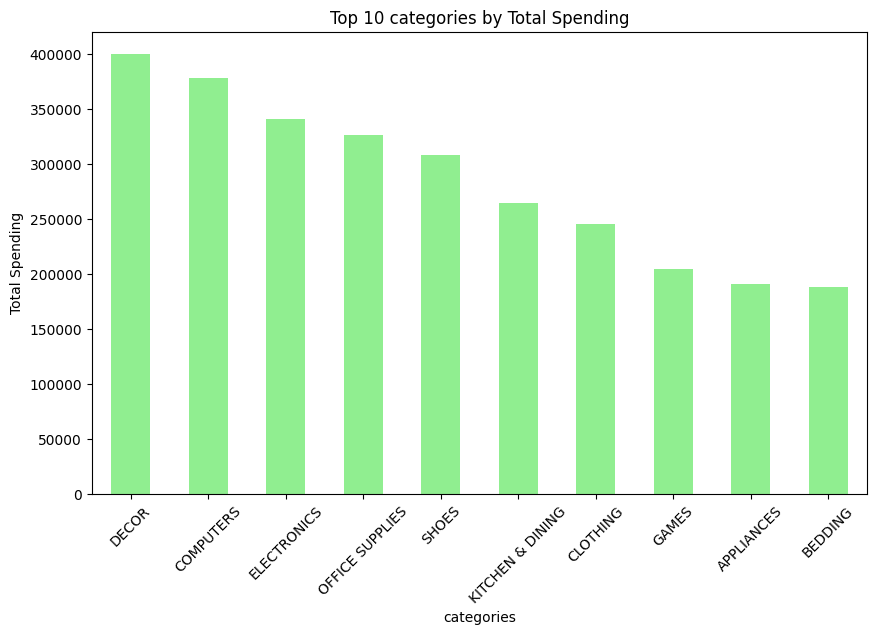

In [67]:
spending_by_state = data.groupby('P_CATEGORY')['Selling_price'].sum()

# Plot the top 10 categories by spending
plt.figure(figsize=(10,6))
spending_by_state.nlargest(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 categories by Total Spending')
plt.xlabel('categories')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

In [68]:

spending_by_state = data.groupby('P_CATEGORY')['Selling_price'].sum()

# Display the top 5 states by spending
spending_by_state.sort_values(ascending=False).head(5)


,Selling_price
P_CATEGORY,
DECOR,400205.4140
COMPUTERS,378677.2750
ELECTRONICS,340897.7695
OFFICE SUPPLIES,326340.8715
SHOES,308042.3085


In [69]:
# Top 5 spending by product
top_products = spending_by_product.nlargest(5)

# Profile customers based on order timing (example)
data['Order Hour'] = data['Date'].dt.hour
timing_profile = data.groupby('Order Hour').size()

timing_profile.head()


,0
Order Hour,
0,1265


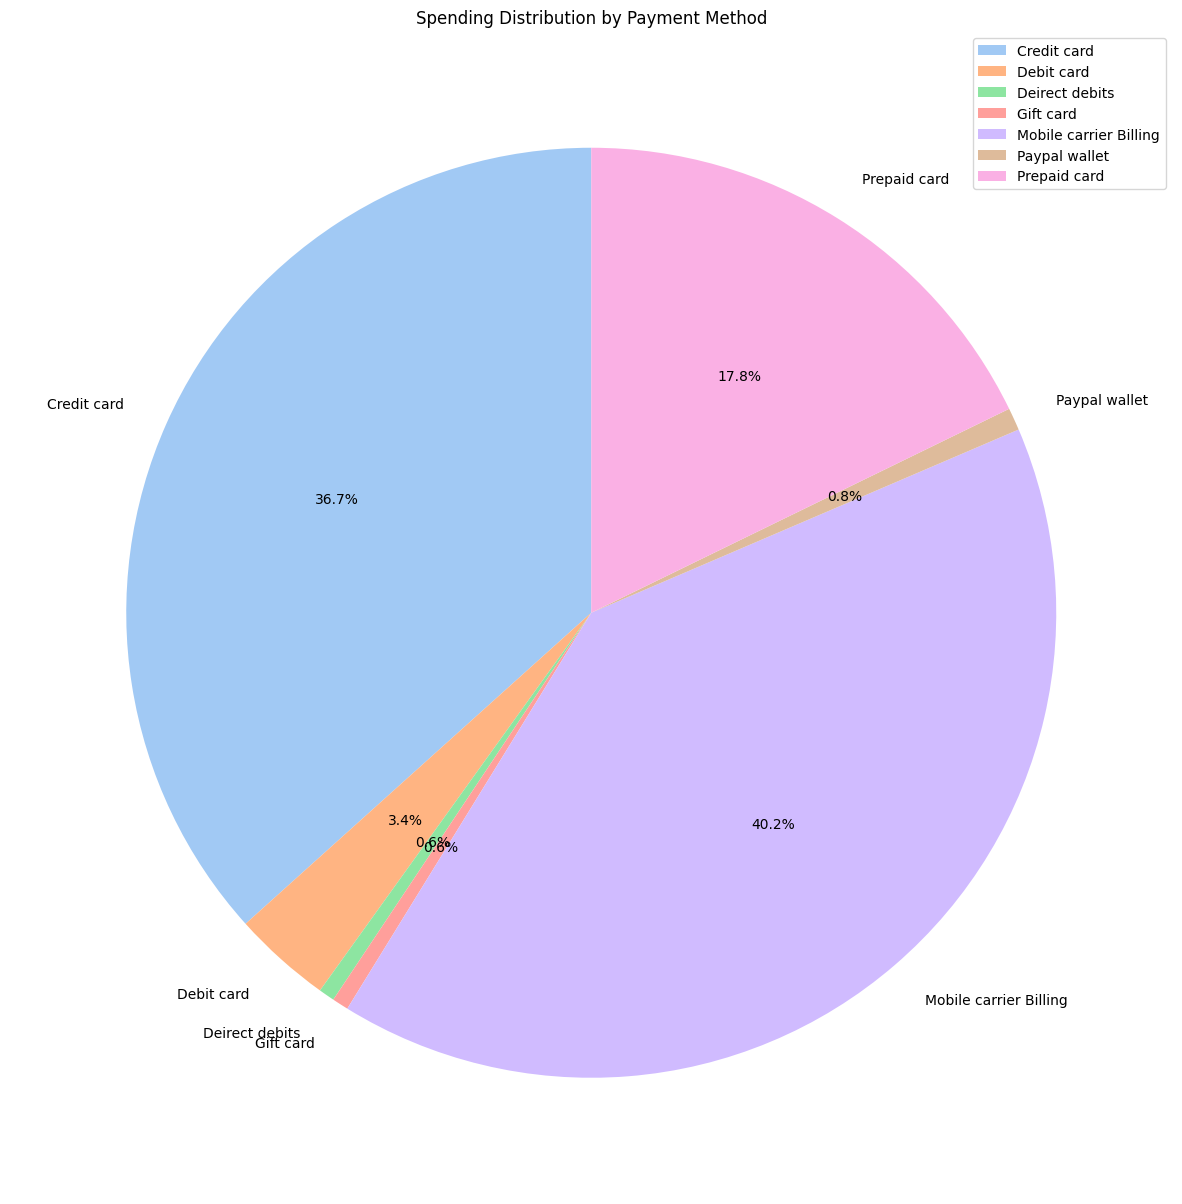

In [70]:

spending_by_payment_method = data.groupby('Payment Method')['Selling_price'].sum()

# Plot pie chart of payment method distribution
plt.figure(figsize=(15,20))
spending_by_payment_method.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Spending Distribution by Payment Method')
plt.legend(labels=spending_by_payment_method.index, loc='best')
plt.ylabel('')
plt.show()


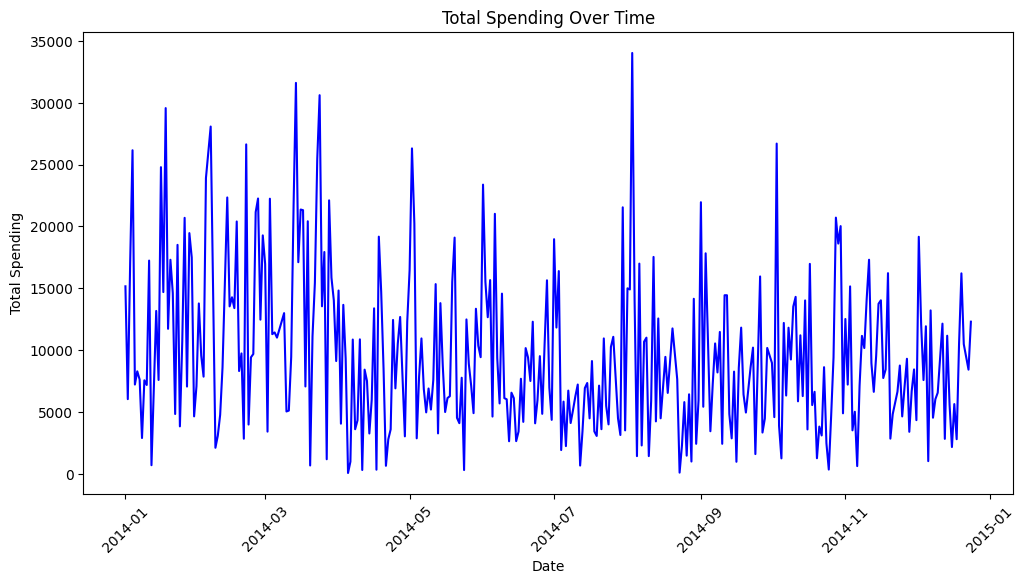

In [71]:
# Convert the 'Purchase Date' column to datetime if not already
data['Date'] = pd.to_datetime(data['Date'])

# Group by day and sum spending
spending_over_time = data.groupby(data['Date'].dt.date)['Selling_price'].sum()

# Plot spending over time
plt.figure(figsize=(12,6))
spending_over_time.plot(kind='line', color='blue')
plt.title('Total Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()


In [72]:

print(data.columns)


Index(['Credit_card', 'Product_ID', 'P_CATEGORY', 'CONDTION', 'Brand',
       'Price ', 'Selling_price', 'Coupon_ID', 'Date', 'Time', 'GTIN', 'MPN',
       'Merchant_name', 'M_ID', 'Payment Method', 'Transaction ID',
       'Return_ind', 'Return_date', 'Discount', 'Age Group', 'Segment',
       'Order Hour'],
      dtype='object')


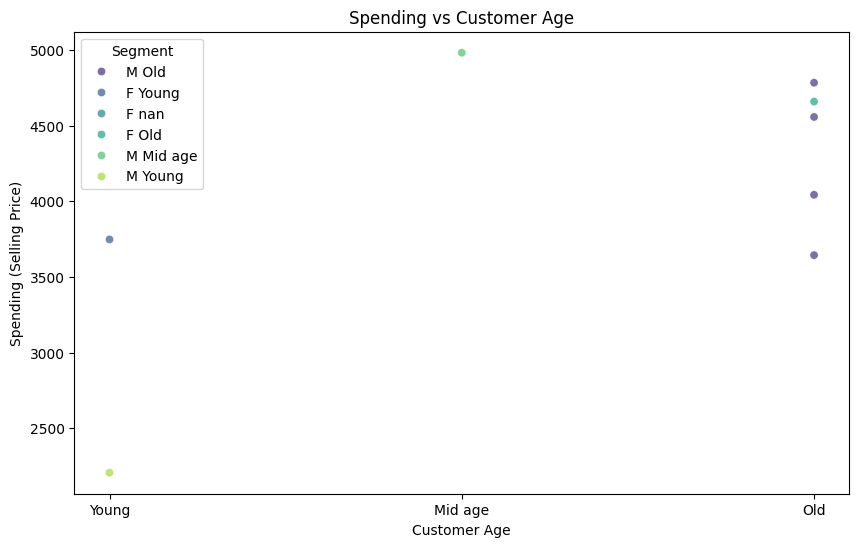

In [73]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Age Group', y='Price ', hue='Segment', palette='viridis', alpha=0.7)
plt.title('Spending vs Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Spending (Selling Price)')
plt.show()